In [1]:
# Loading data
import pandas as pd
file_name = "Airbnb_data.csv"
df = pd.read_csv(file_name)
df.head()
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [2]:
# Handling missing value
df['reviews_per_month'].fillna(0, inplace = True)
df['last_review'].fillna('No review', inplace = True)
df.dropna(subset = ['name','host_name'], inplace = True)
df.isnull().sum()
df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,10/19/2018,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,5/21/2019,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,No review,0.00,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,7/5/2019,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,11/19/2018,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,No review,0.00,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,No review,0.00,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,No review,0.00,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,No review,0.00,6,2


In [5]:
# Convert data type
df['last_review'] = pd.to_datetime(df['last_review'], errors = 'coerce')
df['price'] = pd.to_numeric(df['price'], errors = 'coerce')
df.dropna(subset = 'price', inplace = True)
df['price'].replace('[/$,]', '', regex = True).astype(float)

0        149.0
1        225.0
2        150.0
3         89.0
4         80.0
         ...  
48890     70.0
48891     40.0
48892    115.0
48893     55.0
48894     90.0
Name: price, Length: 48858, dtype: float64

In [6]:
# Removing duplicates
df.drop_duplicates(inplace = True)
df.duplicated().sum()

0

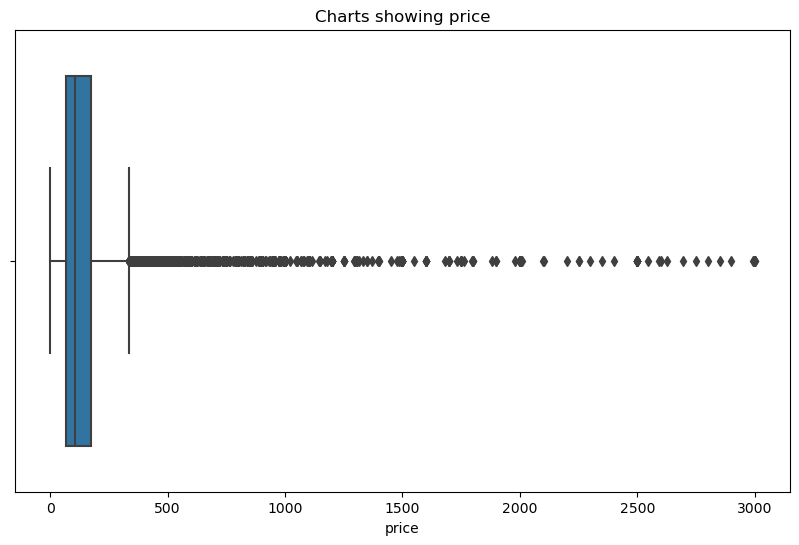

In [10]:
# Handle outliners
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize = (10,6))
sns.boxplot(x = df['price'])
plt.title('Charts showing price')
plt.show()
df = df[df['price'] < 3000]

In [12]:
# Standardize data
df.columns = df.columns.str.lower()
df['room_type'] = df['room_type'].str.title()
df['name'] = df['name'].str.title()
df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & Quiet Apt Home By The Park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private Room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire Home/Apt,225,1,45,2019-05-21,0.38,2,355
2,3647,The Village Of Harlem....New York !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private Room,150,3,0,NaT,0.00,1,365
3,3831,Cozy Entire Floor Of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire Home/Apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft By Central Park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire Home/Apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming One Bedroom - Newly Renovated Rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private Room,70,2,0,NaT,0.00,2,9
48891,36485057,Affordable Room In Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private Room,40,4,0,NaT,0.00,2,36
48892,36485431,Sunny Studio At Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire Home/Apt,115,10,0,NaT,0.00,1,27
48893,36485609,43Rd St. Time Square-Cozy Single Bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared Room,55,1,0,NaT,0.00,6,2


In [13]:
# Performing EDA
# Data overview
# Data overview
df['room_type'].value_counts()
df['neighbourhood'].value_counts()

neighbourhood
Williamsburg          3916
Bedford-Stuyvesant    3710
Harlem                2653
Bushwick              2462
Upper West Side       1961
                      ... 
Fort Wadsworth           1
Richmondtown             1
New Dorp                 1
Rossville                1
Willowbrook              1
Name: count, Length: 221, dtype: int64

C:\Users\Brad Le\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


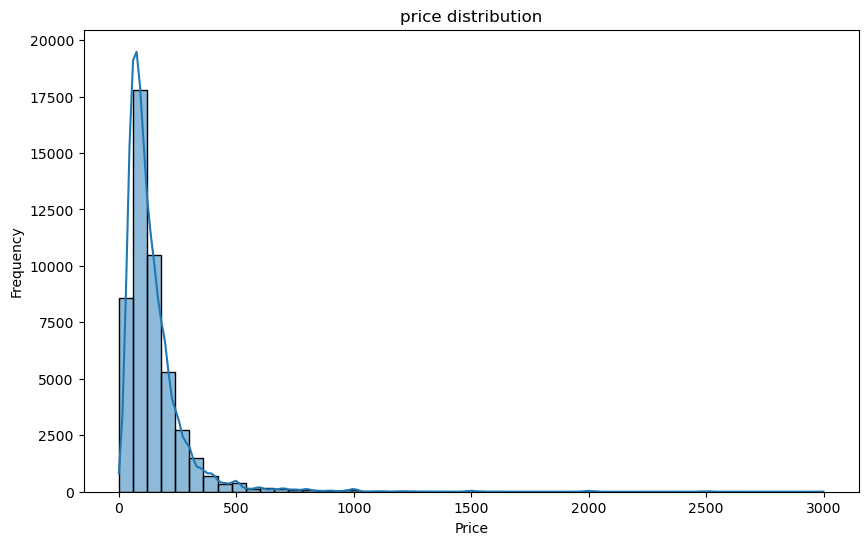

In [15]:
# Exploring price distribution
plt.figure(figsize = (10,6))
sns.histplot(df['price'], bins = 50, kde = True)
plt.title('price distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

<Figure size 1000x600 with 0 Axes>

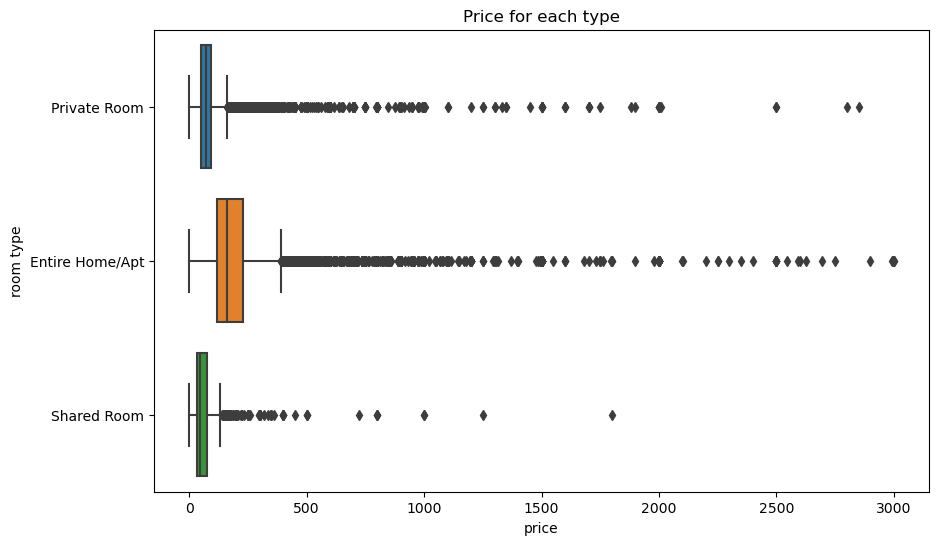

In [17]:
# Exploring price for room types
plt.figure(figsize = (10,6))
plt.figure(figsize = (10,6))
sns.boxplot( x = df['price'], y= df['room_type'], data = df)
plt.title('Price for each type')
plt.xlabel('price')
plt.ylabel('room type')
plt.show()
        

C:\Users\Brad Le\AppData\Local\Temp\ipykernel_18716\4153219629.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x = df['room_type'], y = df['availability_365'], ci = None)


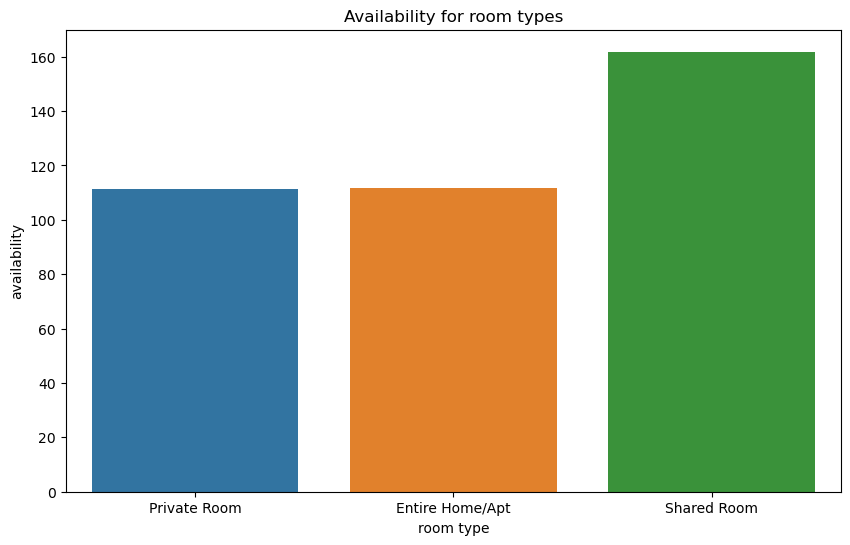

In [18]:
# Availability analysis
plt.figure(figsize = (10,6))
sns.barplot(x = df['room_type'], y = df['availability_365'], ci = None)
plt.title('Availability for room types')
plt.xlabel('room type')
plt.ylabel('availability')
plt.show()

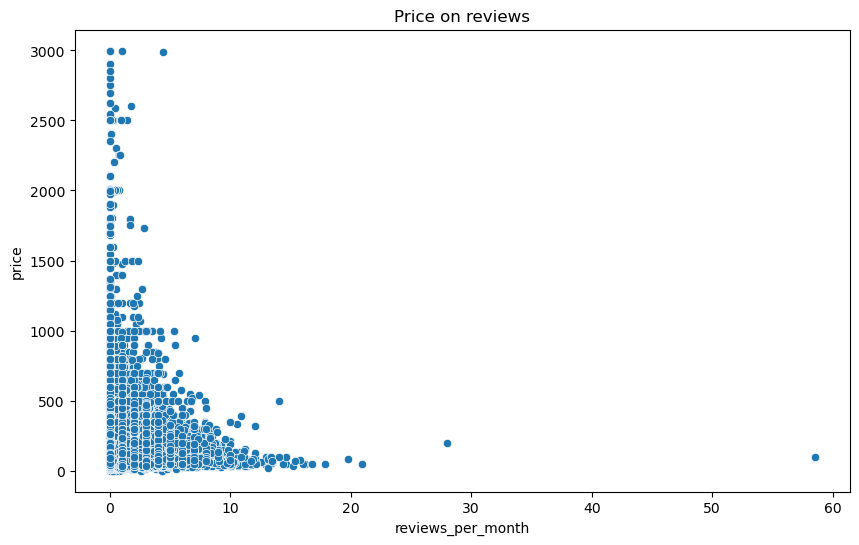

In [19]:
# Review - price analysis 
plt.figure(figsize = (10,6))
sns.scatterplot(x = 'reviews_per_month', y = 'price', data = df)
plt.title('Price on reviews')
plt.show()